In [ ]:
# Nernay Kumar
# Intern Id 
# INT2026-9021

In [ ]:
# Install if needed (run once)
%pip install seaborn matplotlib pandas numpy ipywidgets

In [ ]:
# Install if needed:
# pip install kagglehub[pandas-datasets]

import glob
import os

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Dataset handle (from the Kaggle URL)
DATASET_HANDLE = "sonalshinde123/student-academic-performance-dataset"

try:
    # Download dataset bundle first
    dataset_path = kagglehub.dataset_download(DATASET_HANDLE)

    # Pick the first CSV in the bundle (adjust if needed)
    csv_files = glob.glob(os.path.join(dataset_path, "**", "*.csv"), recursive=True)
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the downloaded dataset.")

    file_path = csv_files[0]

    # Load the CSV into a DataFrame
    df = kagglehub.dataset_load(
        KaggleDatasetAdapter.PANDAS,
        DATASET_HANDLE,
        os.path.basename(file_path),
    )

    print("Loaded file:", os.path.basename(file_path))
    print(df.head())
    print(df.shape)
except Exception as e:
    print("Dataset download/load failed.")
    print("Make sure you have Kaggle API credentials set and accepted the dataset rules.")
    print("Error:", e)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Basic overview
print(df.head())
print(df.shape)
print(df.columns)

# Helper: pick key columns robustly
lower_map = {c: c.strip().lower() for c in df.columns}

# Candidate columns
gender_col = next(
    (c for c, lc in lower_map.items() if lc in {"gender", "sex"}),
    None,
)
attendance_col = next(
    (c for c, lc in lower_map.items() if "attendance" in lc or "attend" in lc),
    None,
)

numeric_cols = df.select_dtypes(include="number").columns.tolist()
score_cols = [
    c
    for c, lc in lower_map.items()
    if c in numeric_cols
    and any(k in lc for k in ["score", "mark", "grade", "gpa", "cgpa", "percent", "percentage", "result", "performance"])
]

if not score_cols:
    score_cols = numeric_cols[:]

performance = df[score_cols].mean(axis=1) if score_cols else None

print("Gender column:", gender_col)
print("Attendance column:", attendance_col)
print("Score columns:", score_cols)

  Student_ID  Attendance (%)  Internal Test 1 (out of 40)  \
0      S1000              84                           30   
1      S1001              91                           24   
2      S1002              73                           29   
3      S1003              80                           36   
4      S1004              84                           31   

   Internal Test 2 (out of 40)  Assignment Score (out of 10)  \
0                           36                             7   
1                           38                             6   
2                           26                             7   
3                           35                             7   
4                           37                             8   

   Daily Study Hours  Final Exam Marks (out of 100)  
0                  3                             72  
1                  3                             56  
2                  3                             56  
3                  3            

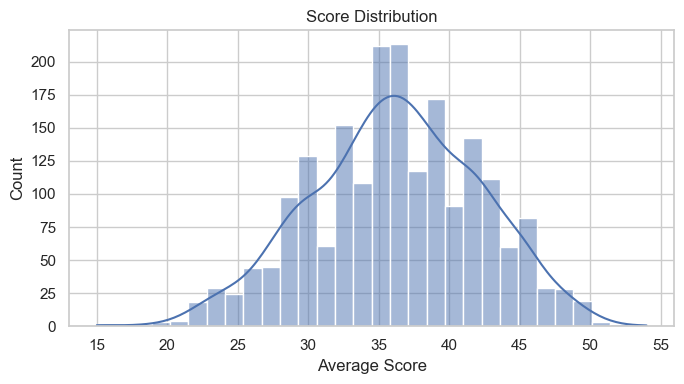

Gender or score data not available for gender vs performance chart.


In [6]:
# 1) Score distribution plot
if performance is not None and len(score_cols) > 0:
    plt.figure(figsize=(7, 4))
    sns.histplot(performance.dropna(), bins=30, kde=True)
    plt.title("Score Distribution")
    plt.xlabel("Average Score" if len(score_cols) > 1 else score_cols[0])
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric score columns found for distribution plot.")

# 2) Gender vs performance chart
if gender_col and performance is not None:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=gender_col, y=performance)
    plt.title("Gender vs Performance")
    plt.xlabel("Gender")
    plt.ylabel("Average Score")
    plt.tight_layout()
    plt.show()
else:
    print("Gender or score data not available for gender vs performance chart.")

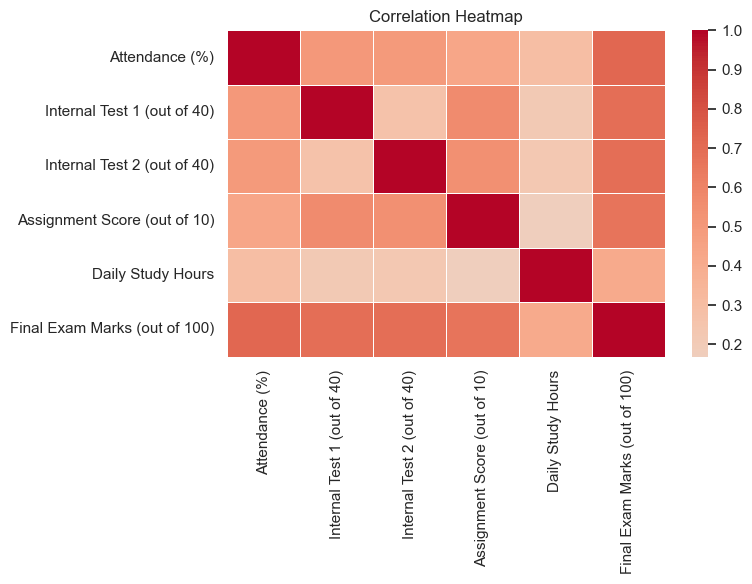

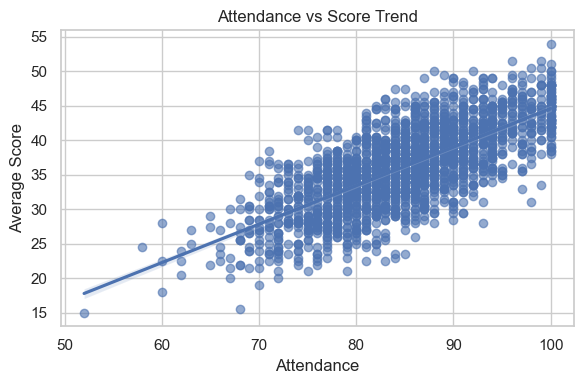

In [7]:
# 3) Correlation heatmap
if numeric_cols:
    plt.figure(figsize=(8, 6))
    corr = df[numeric_cols].corr(numeric_only=True)
    sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")

# 4) Attendance vs score trend chart
if attendance_col and performance is not None:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=df[attendance_col], y=performance, scatter_kws={"alpha": 0.6})
    plt.title("Attendance vs Score Trend")
    plt.xlabel("Attendance")
    plt.ylabel("Average Score")
    plt.tight_layout()
    plt.show()
else:
    print("Attendance or score data not available for trend chart.")